In [1]:
import geopandas as gpd

In [2]:
gdf = gpd.read_file('airbnbs.shp')

In [3]:
gdf.head()

,ID,Y,X,OBJECTID,ID_1,Listing_Ty,Neighborho,Bedrooms,Bathrooms,Max_Guests,num_rooms,ils_price,geometry
0,1,32.050062,34.788407,1,1,Private room,HaTikva,1,1.0,2,2,121.146172,POINT (34.78841 32.05006)
1,2,32.068772,34.775806,2,2,Private room,Lev HaIr,1,1.5,2,2,174.973846,POINT (34.77581 32.06877)
2,3,32.091028,34.774792,3,3,Entire home/apt,Tzafon Yashan,4,4.0,16,6,3346.841064,POINT (34.77479 32.09103)
3,4,32.087474,34.776225,4,4,Entire home/apt,Tzafon Yashan,2,2.0,6,3,621.967285,POINT (34.77622 32.08747)
4,5,32.053218,34.753980,5,5,Entire home/apt,Old Jaffa,3,2.0,8,4,3221.796631,POINT (34.75398 32.05322)


In [4]:
gdf.crs # get coordinate system details

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

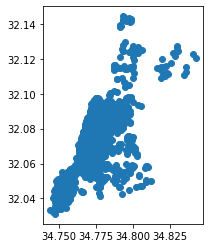

In [5]:
gdf.plot() # plot the data

<AxesSubplot:>

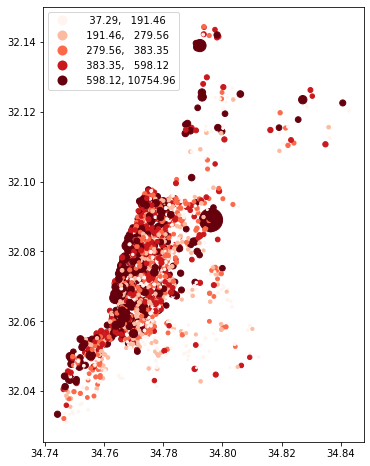

In [6]:
gdf.plot(column='ils_price', figsize=(8,8), markersize=gdf['ils_price']/20, scheme='quantiles', k=5,
        cmap='Reds', legend=True) # plot options

#### Plot two layers at once

In [7]:
neigh = gpd.read_file('neighborhoods.shp')

In [8]:
gdf = gdf.to_crs(neigh.crs) # transform GeoDataFrame's coordinate system

In [9]:
import matplotlib.pyplot as plt

<AxesSubplot:>

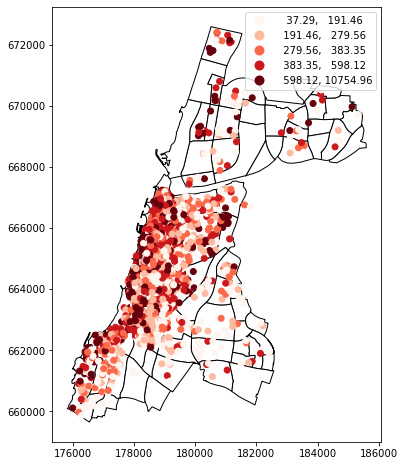

In [10]:
fig, ax = plt.subplots(figsize=(8,8))
neigh.plot(edgecolor='black', color='white', ax=ax)
gdf.plot(column='ils_price', scheme='quantiles', k=5,
        cmap='Reds', legend=True, ax=ax)

#### Geographic operations

<AxesSubplot:>

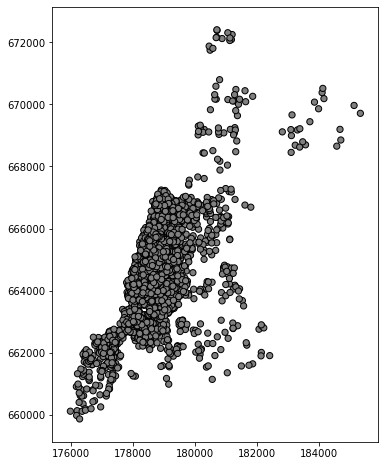

In [11]:
gdf.buffer(100).plot(figsize=(8,8), edgecolor='black', color='grey')

In [12]:
neigh['FNAME']

0              צוקי אביב
1             רמת אביב ג
2         אוניברסיטת ת"א
3             כוכב הצפון
4     נווה אביבים וסביבת
             ...        
67        רמת אביב החדשה
68              אזורי חן
69           אזור שדה דב
70          מרכז הירידים
71                 גאולה
Name: FNAME, Length: 72, dtype: object

In [13]:
gdf.distance(neigh[neigh['FNAME']=='רמת אביב ג']) # this only compares by row index

C:\Users\solom\anaconda3\lib\site-packages\geopandas\base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


0               NaN
1       6234.511999
2               NaN
3               NaN
4               NaN
           ...     
2778            NaN
2779            NaN
2780            NaN
2781            NaN
2782            NaN
Length: 2783, dtype: float64

In [14]:
neigh['geometry'].values

<GeometryArray>
[          <shapely.geometry.polygon.Polygon object at 0x00000191F9190D30>,
Length: 72, dtype: geometry

In [15]:
type(neigh.loc[neigh['FNAME']=='רמת אביב ג', 'geometry'].values[0]) # convert polygon geometry to shapely polygon

shapely.geometry.polygon.Polygon

In [16]:
gdf.distance(neigh.loc[neigh['FNAME']=='רמת אביב ג', 'geometry'].values[0]) # get distance of each feature to polygon

0       8020.324054
1       6234.511999
2       3973.265815
3       4269.483915
4       8601.374944
           ...     
2778    7538.287610
2779    5585.376388
2780    6812.433480
2781    6412.960730
2782    7521.271729
Length: 2783, dtype: float64

In [17]:
gdf[gdf.intersects(neigh.loc[neigh['FNAME']=='רמת אביב ג', 'geometry'].values[0])] # find points intersecting with polygon

,ID,Y,X,OBJECTID,ID_1,Listing_Ty,Neighborho,Bedrooms,Bathrooms,Max_Guests,num_rooms,ils_price,geometry
303,304,32.123727,34.799688,304,304,Entire home/apt,Ramat Aviv Gimel,1,1.0,2,2,314.763123,POINT (181260.793 670110.137)
647,648,32.124127,34.797565,648,648,Private room,Ramat Aviv Gimel,3,4.0,1,5,107.045219,POINT (181060.572 670155.282)
1188,1189,32.127068,34.800286,1189,1189,Entire home/apt,Ramat Aviv Gimel,3,2.0,6,4,543.462952,POINT (181318.660 670480.357)
1279,1280,32.126704,34.803405,1280,1280,Private room,Ramat Aviv Gimel,1,1.0,2,2,134.908157,POINT (181612.794 670438.915)
1281,1282,32.122772,34.801203,1282,1282,Private room,Ramat Aviv Gimel,1,1.0,1,2,103.384392,POINT (181403.337 670003.689)
1282,1283,32.124226,34.801548,1283,1283,Private room,Ramat Aviv Gimel,1,1.0,1,2,77.962006,POINT (181436.504 670164.810)
1786,1787,32.125092,34.806033,1787,1787,Entire home/apt,Ramat Aviv Gimel,3,2.5,6,4,878.225037,POINT (181860.111 670259.225)
1913,1914,32.123708,34.799178,1914,1914,Private room,Ramat Aviv Gimel,1,1.0,2,2,135.450501,POINT (181212.623 670108.218)
2642,2643,32.125555,34.799846,2643,2643,Private room,Ramat Aviv Gimel,3,1.0,6,4,301.679047,POINT (181276.479 670312.816)


In [18]:
gdf[gdf.intersects(gdf.iloc[0]['geometry'].buffer(400))] # find neighbors of a point

,ID,Y,X,OBJECTID,ID_1,Listing_Ty,Neighborho,Bedrooms,Bathrooms,Max_Guests,num_rooms,ils_price,geometry
0,1,32.050062,34.788407,1,1,Private room,HaTikva,1,1.0,2,2,121.146172,POINT (180164.764 661945.377)
875,876,32.053009,34.787764,876,876,Private room,HaTikva,0,1.0,2,0,165.177750,POINT (180105.268 662272.434)
1515,1516,32.051639,34.788857,1516,1516,Private room,HaTikva,1,2.0,3,2,102.536980,POINT (180207.871 662120.138)
1563,1564,32.051323,34.788703,1564,1564,Entire home/apt,HaTikva,0,1.0,2,0,167.550507,POINT (180193.215 662085.098)
1727,1728,32.050706,34.786948,1728,1728,Entire home/apt,HaTikva,1,1.0,2,2,151.246277,POINT (180027.158 662017.365)
2282,2283,32.051110,34.787923,2283,2283,Shared room,HaTikva,1,0.0,3,1,43.251965,POINT (180119.462 662061.737)
2518,2519,32.048944,34.788206,2519,2519,Private room,HaTikva,1,1.0,2,2,92.062958,POINT (180145.260 661821.542)


### Interactive maps!

In [19]:
gdf.explore('ils_price', scheme='quantiles', k=5, cmap='Reds', tiles='CartoDB positron')